# Lab 5 - Classification : Naive Bayes and Logistic Regression

# Optical recognition of handwritten digits dataset
**Download dataset from sklearn. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1.**

In [18]:
from sklearn.datasets import load_digits
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,ComplementNB
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
digits = load_digits()
X = np.resize(digits.images,(len(digits.images),64))
Y = digits.target

In [3]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

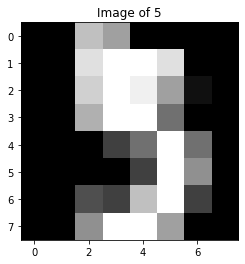

In [4]:
plt.gray()
plt.title("Image of {}".format(digits.target[5]))
plt.imshow(digits.images[5])

# Using sklearn (25 points)

**For this exercise, you will use the naive bayes and logistic regression functions in sklearn. Use the optical recognition dataset.**


**a) Logistic Regression - use one vs all classification method to classify the dataset into one of the ten classes. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too). Tune parameters to obtain the best results.**

**b) Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with all the priors available (Gaussian, Bernoulli, etc) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).**

**Estimated Time: 50 mins**

In [14]:
#Part A Logistic Regression
#default is one vs all
#Default model
Log_model = LogisticRegression().fit(X_train,y_train)
#testing accuracies
y_pred = Log_model.predict(X_test)
#f1 score
f1 = f1_score(y_test,y_pred,average="weighted")
print("F1 score: {}".format(f1))
#Confusion matrix
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:{}".format(con_mat))

#Grid search cv for best hyper parmaeters
parameters = {'penalty':('l1', 'l2'), 'C':[0.001,0.01,0.1,1, 10]}
best_model = LogisticRegression()
clf = GridSearchCV(best_model, parameters, cv=5,verbose=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#f1 score
f1 = f1_score(y_test,y_pred,average="weighted")
print("Best model->{}".format(clf.best_estimator_))
print("Best F1 score: {}".format(f1))
#Confusion matrix
con_mat = confusion_matrix(y_test,y_pred)
print("Best Confusion matrix:{}".format(con_mat))


F1 score: 0.9669777560237893
Confusion matrix:[[38  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  2  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  1  0  0  2  0]
 [ 0  0  0  0 40  0  0  1  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  1 29  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  2  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  1  1 35]]
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.8s finished


Best model->LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best F1 score: 0.9750992881234128
Best Confusion matrix:[[38  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  2  0  0  1  0]
 [ 0  0  0  0 40  0  0  1  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  1 29  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  1  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  1  1 35]]


In [21]:
#Part B Naive Bayes
prior_list = [GaussianNB(),BernoulliNB(),MultinomialNB(),ComplementNB()]

for prior in prior_list:
    #Prior
    model = prior.fit(X_train,y_train)
    #testing accuracies
    y_pred = model.predict(X_test)
    #f1 score
    f1 = f1_score(y_test,y_pred,average="weighted")
    print("F1 score for {}\n{}".format(str(prior),f1))
    #Confusion matrix
    con_mat = confusion_matrix(y_test,y_pred)
    print("Confusion matrix for {}\n{}".format(str(prior),con_mat))

F1 score for GaussianNB(priors=None, var_smoothing=1e-09)
0.8572210348819872
Confusion matrix for GaussianNB(priors=None, var_smoothing=1e-09)
[[36  0  0  0  1  0  0  1  0  0]
 [ 0 31  0  0  0  0  0  1  3  2]
 [ 0  1 34  0  0  0  0  0  4  0]
 [ 0  1  0 33  0  2  0  2  3  0]
 [ 0  0  0  0 36  0  0  5  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  1  0  1  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  1  0  1  0  4 25  0]
 [ 1  2  0  0  1  0  0  8  3 22]]
F1 score for BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.8690023526777814
Confusion matrix for BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
[[36  0  0  0  2  0  0  0  0  0]
 [ 0 26  4  0  0  1  0  0  3  3]
 [ 0  1 36  1  0  0  0  0  1  0]
 [ 0  0  2 34  0  1  0  1  2  1]
 [ 0  0  0  0 39  0  0  2  0  0]
 [ 0  0  0  0  0 22  0  0  0  5]
 [ 0  0  0  0  1  1 28  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  2  1  1  0  0  1  1 27  1]
 [ 0  2  0  0  0  0  0  4  1 30]]


Based on the F1 scores and confusion matrix we can say that MultinomialNB is the best prior amongst all other priors.

# The End